1.	(8 pts) The Bureau of Transportation Statistics (BTS) conducted a study to evaluate the impact of Sept 11 attacks (9/11) on U.S. air transportation. The purpose of this study is to provide a greater understanding of the passenger travel behavior patterns of persons travelling by air before and after the event. In order to assess the impact of September 11, BTS took the following approach: Using data before September 11, it forecasted future data (under the assumption of no terrorist attack). Then, BTS compared the forecasted series with the actual data to assess the impact of the event. 

The data is available in the file: BTS_Air_Rail_Vehicle_Miles.csv. 

a) Is the goal of this study descriptive or predictive ?		(2 pts)

Answer
<br>
The goal of the data is both descriptive and predictive. 
Predictive because it forecasts future values based on pre 9/11 data.
Descriptive because it uses this data to compare with the real observed ones and quantify these changes.

b)	Create a time series plot of the Air data, i.e. a plot yt versus t, where t=1,2,3 … What would t=1, 2, 3 refer to in the time series? Which time period does t=1 refer to ? 

<b>Answer<b> 
<br>
t=1 Refers to the first time in the dataset which is Jan 1990.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Create the time series plot
def plot_time_series(data, x_label, y_label, plot_title):
    time_series_index = range(1, len(data) + 1)
    plt.figure(figsize=(12, 6))
    plt.plot(time_series_index, data, marker='o')
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

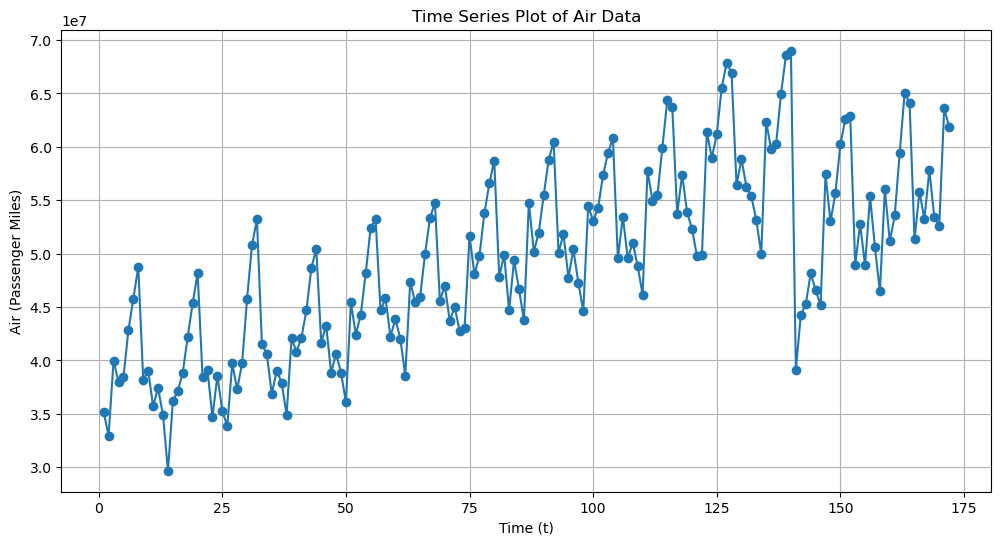

In [4]:
# Correcting the column name to access the 'Air ' data
data = pd.read_csv('data/BTS_Air_Rail_Vehicle_Miles.csv')

air_data = data['Air ']
x_label = 'Time (t)'
y_label = 'Air (Passenger Miles)'
plot_title = 'Time Series Plot of Air Data'
plot_time_series(air_data, x_label, y_label, plot_title)


c)	What are the values for y1, y¬2 and y3 in the time series? 			(3 pts)

In [5]:
y1 = air_data.iloc[0]
y2 = air_data.iloc[1]
y3 = air_data.iloc[2]
y1,y2,y3

(35153577, 32965187, 39993913)

2.	(3 pts) In addition to air travel data, additional time series are also provided in the same data file in Question 1. 

Which of these components appear in the Vehicle time series: i) Seasonality; ii) Trend; iii) Noise. 

Answer
<br>
i)As we can see below the vehicle timeseries has repeating patterns at specific time periods which suggests seasonality.
<br>
ii)There is also an upward trend in the vehicle timeseries.	
<br>
iii)We can notice small amounts of noise in the timeseries since the seasonal patterns are not perfectly symmetrical.


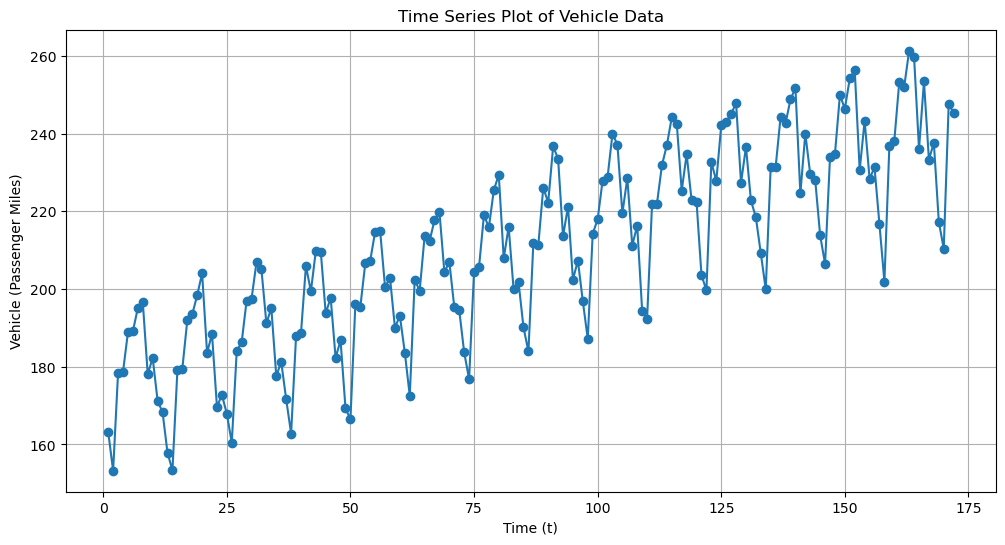

In [6]:
vehicle_data = data['Vehicle']
x_label = 'Time (t)'
y_label = 'Vehicle (Passenger Miles)'
plot_title = 'Time Series Plot of Vehicle Data'
plot_time_series(vehicle_data, x_label, y_label, plot_title)

3.	(3 pts) Forecasting Shampoo Sales: The file ShampooSales.csv contains data on the monthly sales of a certain shampoo over a 3 year period. 
Which of the components (trend, seasonality, noise) are present in this series?

Answer
<br>
Trend is present in the time series as we can see an upward one through the months/years.
<br>
Seasonality is also present as we can see some regular patterns repeating over time for example big spikes around the end of the year (november, december).
<br>
Noise is also present as we can see fluctuating values in the seasonal patterns and the patterns are not perfectly symmetrical.

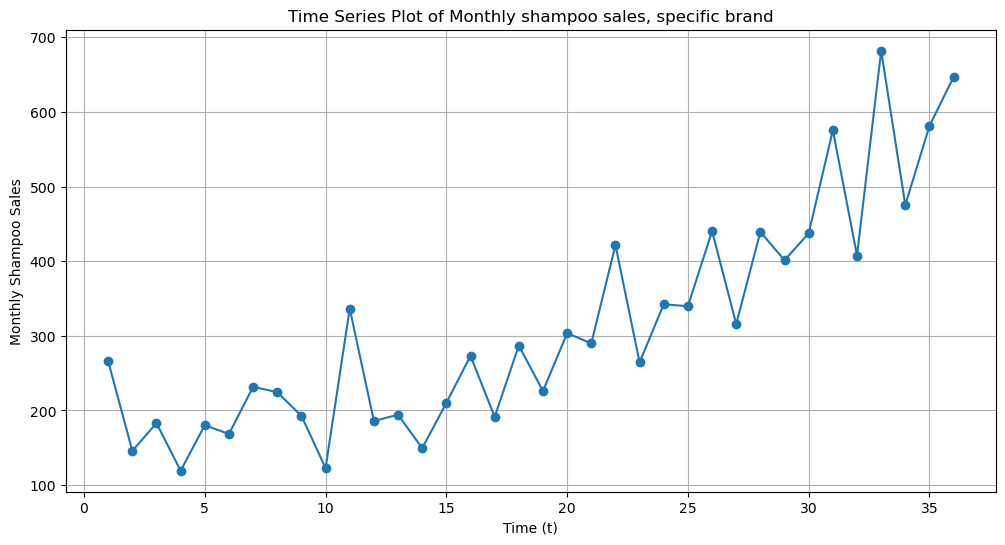

In [7]:
shampoo_data = pd.read_csv('data/ShampooSales.csv')
shampoo_data = shampoo_data['Shampoo Sales']
x_label = 'Time (t)'
y_label = 'Monthly Shampoo Sales'
plot_title = 'Time Series Plot of Monthly shampoo sales, specific brand'
plot_time_series(shampoo_data, x_label, y_label, plot_title)

4.	(15 pts) The file, AirSensorData.xlsx, contains the air quality data from multiple sensors. There are a total of 13 columns that contain the sensor data with the sensor name indicated at the top of the column. Answer the following questions: 
<br>
a)	(4 pts) Create a time-series plot of the first 10 sensors (i.e. 10 columns) by plotting the first 200 points in the data.



In [21]:
# Load the data from the Excel file
file_path = 'data/AirSensorData.xlsx'  # Replace with your actual file path
data = pd.read_excel(file_path)

# Convert 'Date' and 'Time' columns to strings and concatenate them
data['Date'] = data['Date'].astype(str)
data['Time'] = data['Time'].astype(str)

# Combine 'Date' and 'Time' columns into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%Y-%m-%d %H:%M:%S')

# Set the 'Datetime' as the index
data.set_index('Datetime', inplace=True)

# # Display the first few rows to confirm the data is loaded correctly
# print(data.head())


<Figure size 1500x800 with 0 Axes>

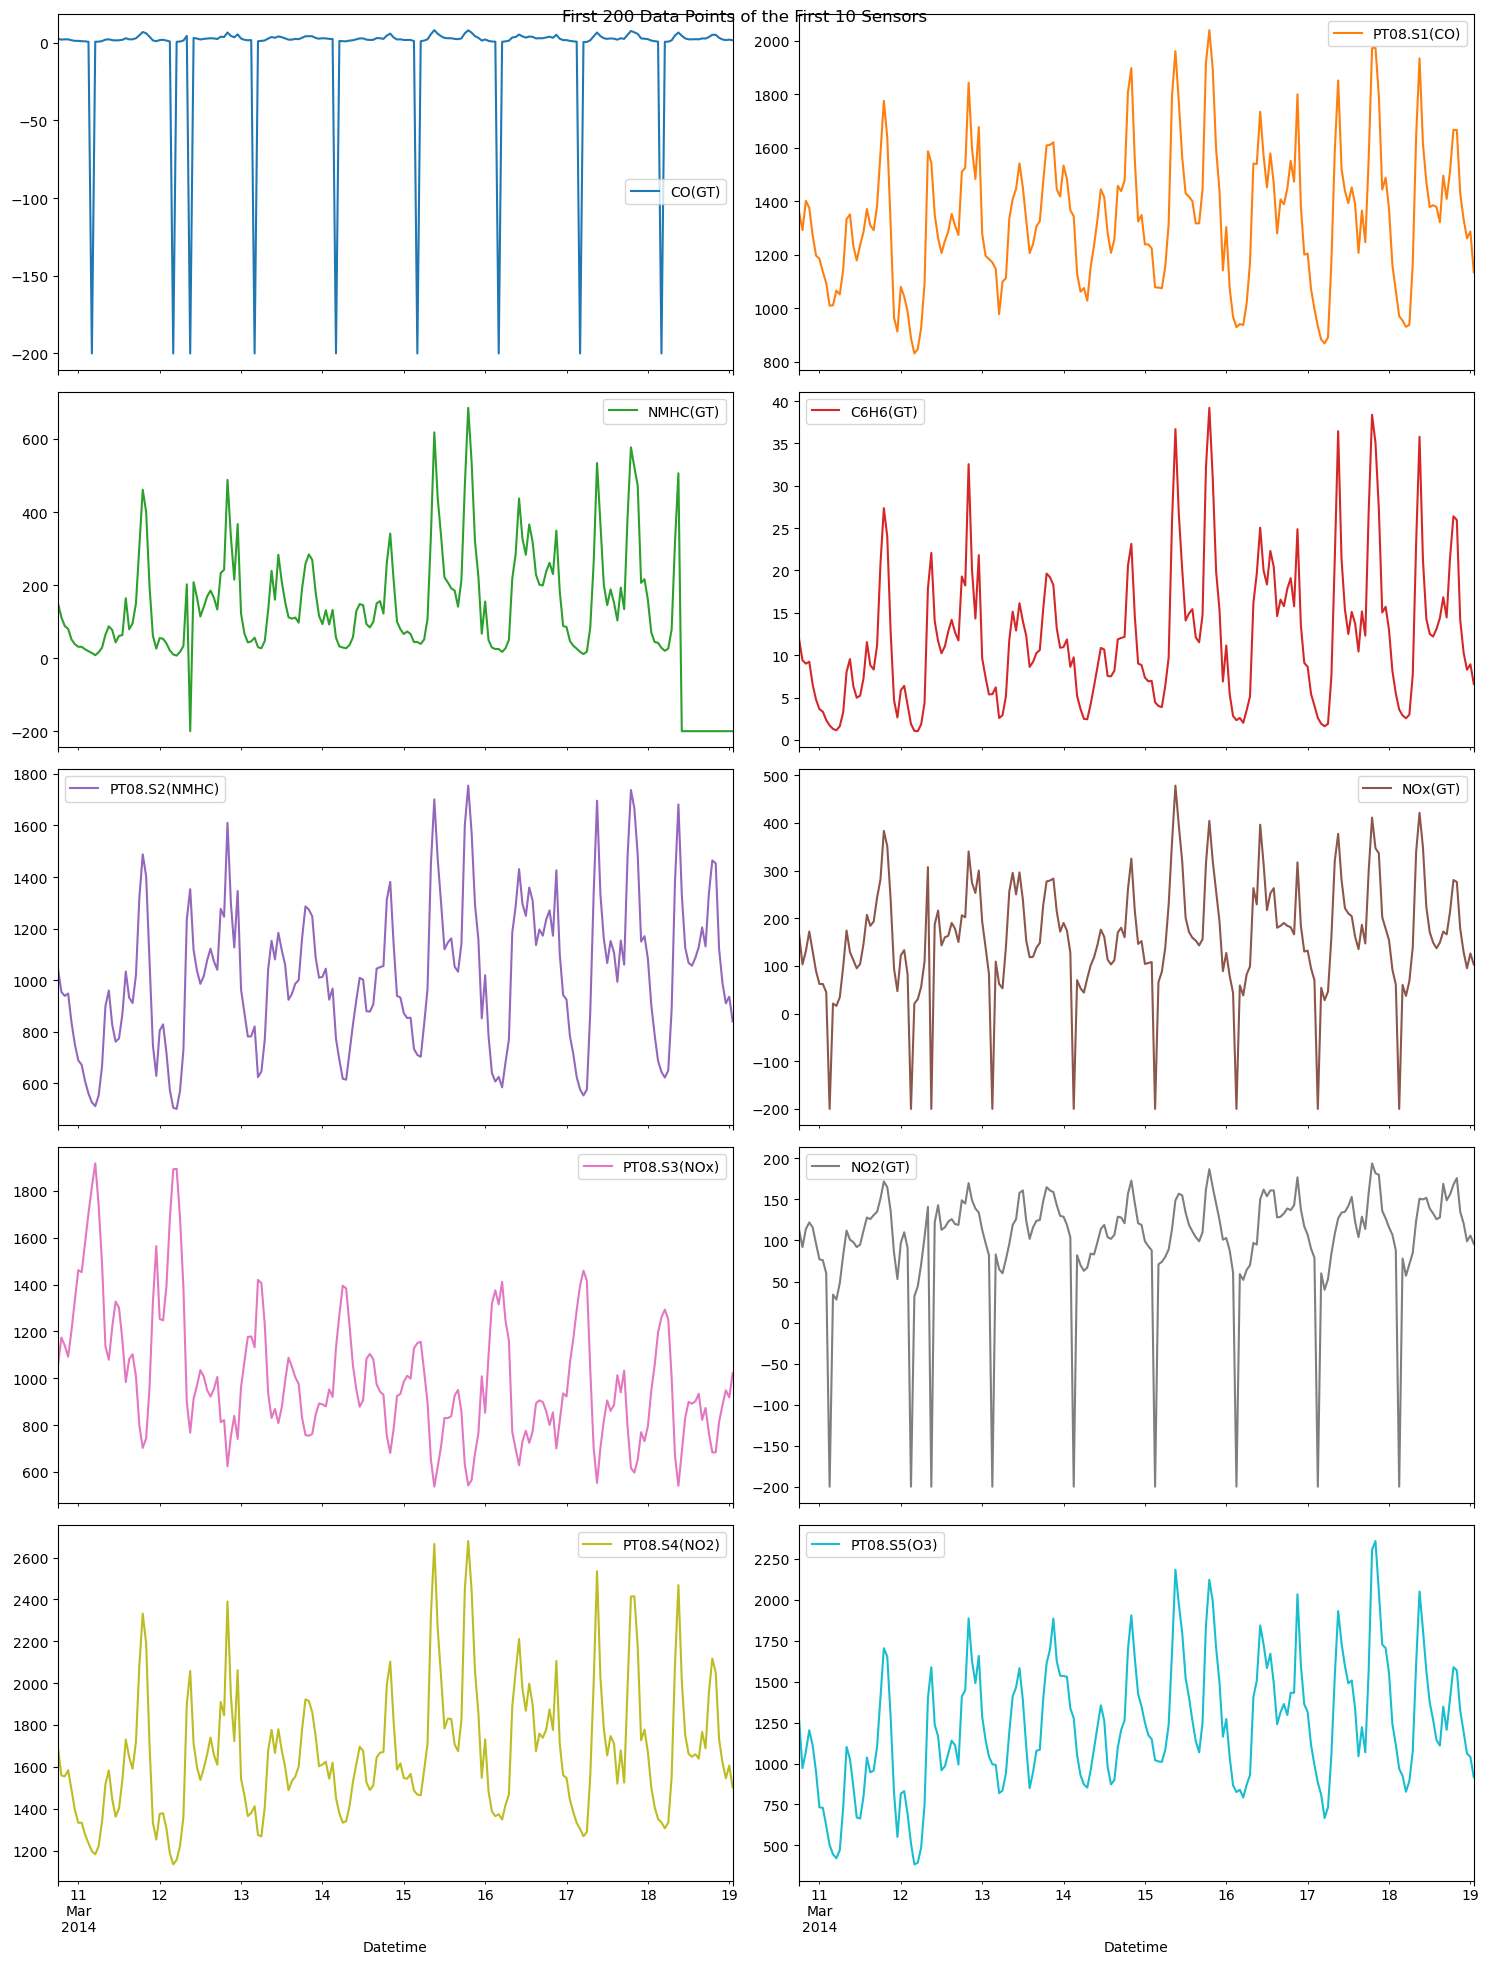

In [23]:
# Select the first 10 sensor columns
sensor_columns = data.columns[2:12]

# Plot the first 200 data points for these sensors
plt.figure(figsize=(15, 8))
data[sensor_columns].iloc[:200].plot(subplots=True, layout=(5, 2), figsize=(15, 20), title="First 200 Data Points of the First 10 Sensors")
plt.tight_layout()
plt.show()


b)	(6 pts) From the plot, you should observe there are erroneous values of “-200” at random. For each of the 13 channels, determine how many such erroneous values are present in the entire dataset? Report your results via a table with 2 columns where the first column contains the sensor name and the second column is the count of the erroneous values for that sensor.


In [38]:
# Subset sensor columns 
sensor_columns = data.columns[2:15]

# Create a dictionary to store counts of -200 for each sensor
error_counts = {sensor: (data[sensor] == -200).sum() for sensor in sensor_columns}

# Convert the dictionary to a DataFrame
error_counts_df = pd.DataFrame(error_counts.items(), columns=['Sensor', 'Erroneous Count'])

# Display the results
print(error_counts_df)


           Sensor  Erroneous Count
0          CO(GT)             1683
1     PT08.S1(CO)              366
2        NMHC(GT)             8443
3        C6H6(GT)              366
4   PT08.S2(NMHC)              366
5         NOx(GT)             1639
6    PT08.S3(NOx)              366
7         NO2(GT)             1642
8    PT08.S4(NO2)              366
9     PT08.S5(O3)              366
10              T              366
11             RH              366
12             AH              366


c)	(5 pts) For the time period from 3/11/2014 0:00 hrs to 3/31/2014 23:00:00 hrs (both included), plot the time series for the sensor column C6H6(GT) consisting of daily average values. Report the maximum and minimum daily average value. 

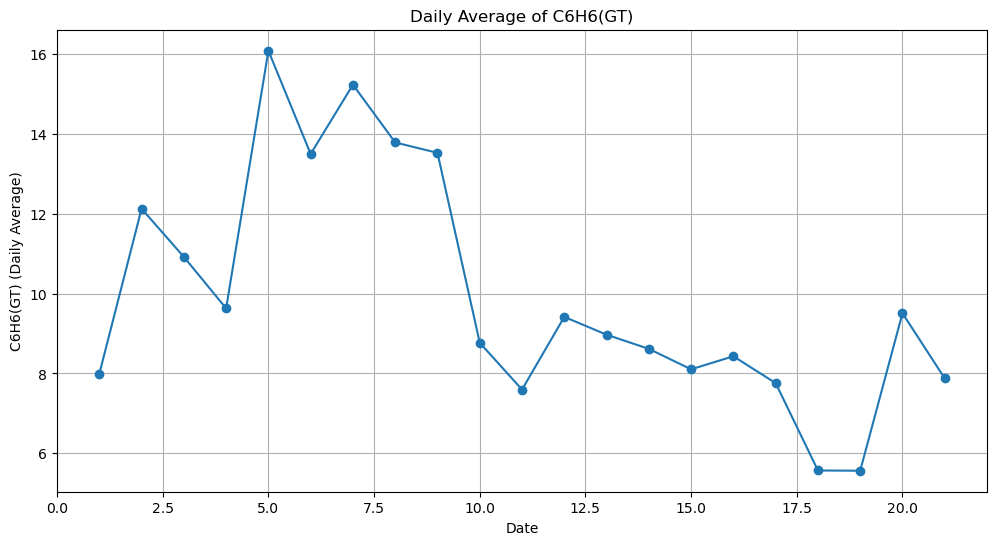

Maximum Daily Average: 16.08994641696814
Minimum Daily Average: 5.562205953551018


In [46]:
sensor_c6h6 = data['C6H6(GT)']

# Filter data for the specified date range
start_date = '2014-03-11 00:00:00'
end_date = '2014-03-31 23:00:00'
filtered_data = sensor_c6h6.loc[start_date:end_date]

# Calculate daily average for 'C6H6(GT)'
daily_avg = filtered_data.resample('D').mean()

# Plot the daily average time series
plot_time_series(daily_avg, 'Date', 'C6H6(GT) (Daily Average)', 'Daily Average of C6H6(GT)')

# Report the maximum and minimum daily average values
max_value = daily_avg.max()
min_value = daily_avg.min()

print(f"Maximum Daily Average: {max_value}")
print(f"Minimum Daily Average: {min_value}")


5.	(6 pts) The file, Beverages_Shipment_2020.csv, contains the US beverage product shipments data. 

a)	Is there seasonality in this time series?						(2 pts)

Answer:
Yes there is seasonality in the time-series as we can see a repeating pattern through specific periods (every 12 months).


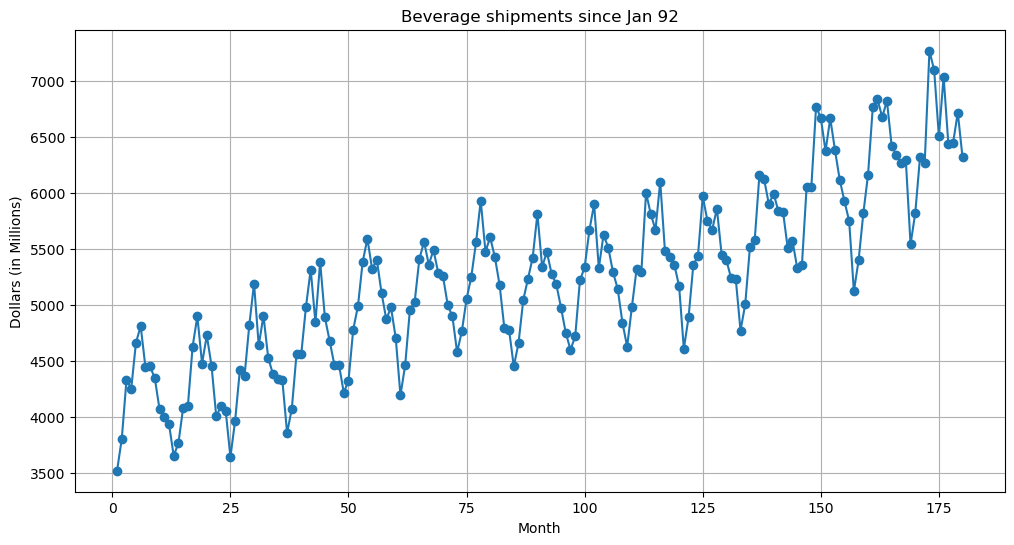

In [51]:
beverage_data = pd.read_csv('data/Beverages_Shipment_2020.csv')
# Convert 'Month' to datetime format
beverage_data['Month'] = pd.to_datetime(beverage_data['Month'], format='%b-%y')
# Set 'Month' as the index
beverage_data.set_index('Month', inplace=True)
plot_time_series(beverage_data, 'Month', 'Dollars (in Millions)', 'Beverage shipments since Jan 92')

b)	Find the sample autocorrelation function for this data set. 			(2 pts)
<br>
(For Python, you can use the “plot_acf” function in “statmodels” module. Plot at least 25 lags)



<Figure size 1200x600 with 0 Axes>

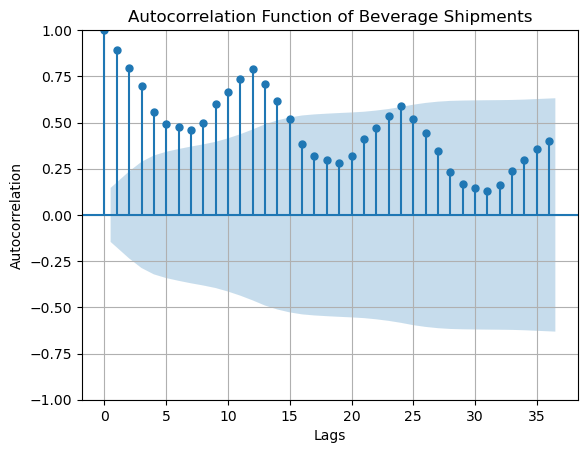

In [55]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the sample autocorrelation function for the dataset
plt.figure(figsize=(12, 6))
plot_acf(beverage_data['Dollars (in Millions)'], lags=36)
plt.title('Autocorrelation Function of Beverage Shipments')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

c)	From the auto-correlation plot in (b), what is the seasonal period (state the units)? Explain your answer.        (2 pts)

Answer:
Since the data is monthly, each lag represents one month. 
We can see spikes every 12 lags, indicating a strong correlation with values 12 months apart, meaning, our data has a yearly seasonality.
The seasonal period is 12 months or annual.

6.	(10 pts) Data on US coal production is given in Coal_Production_US_2020.csv. 

a)	Plot the coal production data and the sample autocorrelation function. 		(2 pts)


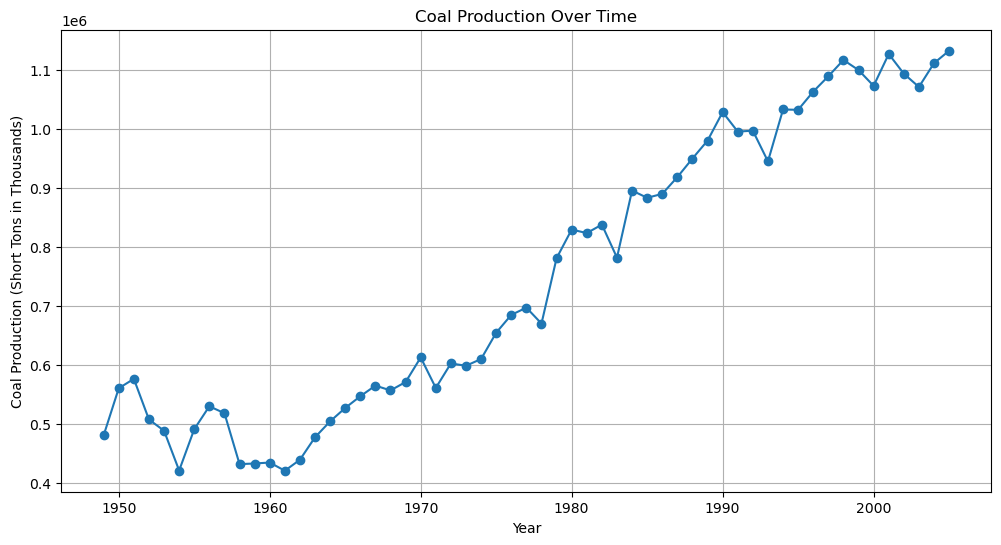

<Figure size 1200x600 with 0 Axes>

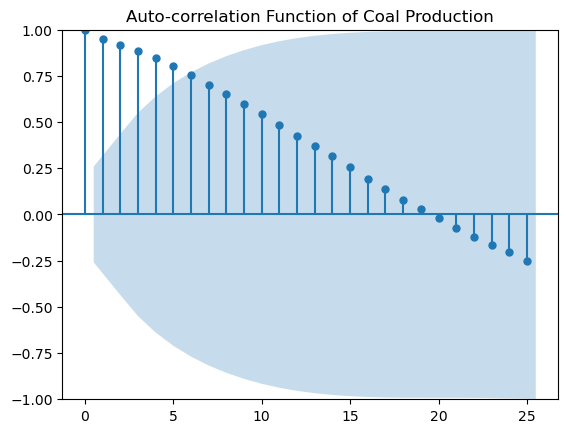

In [66]:
coal_production_data = pd.read_csv('data/Coal_Production_US_2020.csv')
# Convert 'Month' to datetime format
coal_production_data['Year'] = pd.to_datetime(coal_production_data['Year'], format='%Y')
# Set 'Year' as the index
coal_production_data.set_index('Year', inplace=True)
coal_production_col_name = 'Coal Production, Short Tons in Thousands'
# a) Plot the coal production data
plt.figure(figsize=(12, 6))
plt.plot(coal_production_data.index, coal_production_data[coal_production_col_name], marker='o')
plt.title('Coal Production Over Time')
plt.xlabel('Year')
plt.ylabel('Coal Production (Short Tons in Thousands)')
plt.grid(True)
plt.show()

# Plot the sample autocorrelation function
plt.figure(figsize=(12, 6))
plot_acf(coal_production_data['Coal Production, Short Tons in Thousands'], lags=25)
plt.title('Auto-correlation Function of Coal Production')
plt.show()


b)	Is the time series stationary or non-stationary? 					(2 pts)

Answer:

The time series is non-stationary. We can clearly see an upward trend where the coal production increases over time. The auto-correlation function decays slowly over time which is indicative of this type of non-stationary time series because even with values with higher lags we still have a significant correlation.

c)	Plot the first difference of the time series and the sample auto-correlation function of the first difference. 									(4 pts)



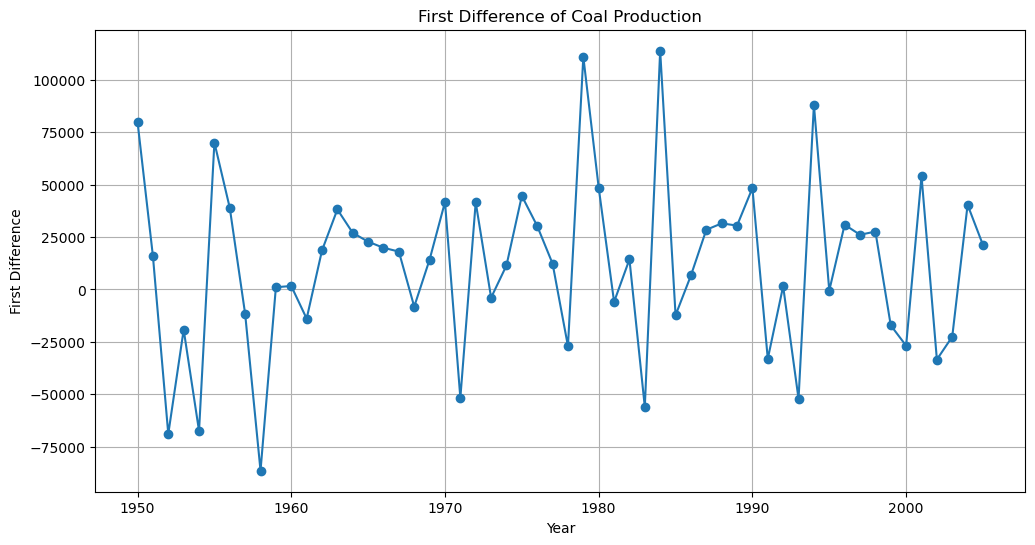

<Figure size 1200x600 with 0 Axes>

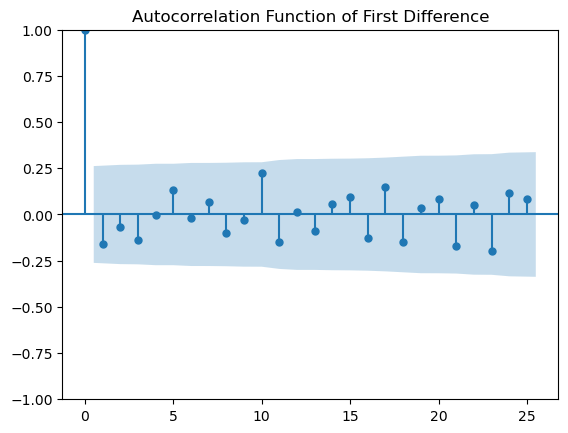

In [67]:
# Plot the first difference of the time series
coal_production_data['First Difference'] = coal_production_data[coal_production_col_name].diff()

# Plot the first difference
plt.figure(figsize=(12, 6))
plt.plot(coal_production_data.index, coal_production_data['First Difference'], marker='o')
plt.title('First Difference of Coal Production')
plt.xlabel('Year')
plt.ylabel('First Difference')
plt.grid(True)
plt.show()

# Plot the ACF of the first difference
plt.figure(figsize=(12, 6))
plot_acf(coal_production_data['First Difference'].dropna(), lags=25)
plt.title('Auto-correlation Function of First Difference')
plt.show()


d)	What impact has differencing had on the time series? Comment with respect to presence or absence of stationarity.								(2 pts)

Answer:
<br>
The impact of differencing in the series is that it helps remove the trend and makes the data more stationary. This happens because if the original series has a consistent upward or downward trend, the differences between consecutive values will be relatively constant.
<br>
After differencing, the ACF plot should show a rapid drop-off of auto-correlation values, indicating that the differenced series is more stationary.
And this is visible as starting from lag 1 we have a decay of the auto-correlation function to close to 0.
<br>